In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv("C:/Users/Admin/Downloads/medicine.csv")
data

,Unnamed: 0,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
2,5,6,Allegra-M Tablet,241.48,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Montelukast (10mg),Fexofenadine (120mg)
3,6,7,Amoxyclav 625 Tablet,223.27,False,Abbott,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
4,9,10,Ascoril D Plus Syrup Sugar Free,129.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Phenylephrine (5mg),Chlorpheniramine Maleate (2mg)
...,...,...,...,...,...,...,...,...,...,...
112166,253957,253958,Zocxafen 250mg/50mg/325mg Tablet,34.69,False,Raffles Pharmaceuticals,allopathy,strip of 10 tablets,Chlorzoxazone (250mg),Diclofenac (50mg)
112167,253962,253963,Zestrain 100mg/325mg/250mg Tablet MR,70.00,False,Vesnik Molecules,allopathy,strip of 10 tablet mr,Aceclofenac (100mg),Paracetamol (325mg)
112168,253965,253966,Zeotaz 4000mg/500mg Injection,490.00,False,Intsia Pharma Private Limited,allopathy,vial of 1 Injection,Piperacillin (4000mg),Tazobactum (500mg)
112169,253966,253967,Zogrell A 75mg/75mg Tablet,75.00,False,Vhb Life Sciences Inc,allopathy,strip of 10 tablets,Aspirin (75mg),Clopidogrel (75mg)


In [60]:
data.shape

(112171,)

In [84]:
data['price(₹)'].min()

1.25

In [86]:
data['price(₹)'].max()

119500.0

In [88]:
data['price(₹)'].median()

85.0

In [90]:
data['price(₹)'].describe()

count    112171.00000
mean        127.33798
std         546.37616
min           1.25000
25%          55.00000
50%          85.00000
75%         140.00000
max      119500.00000
Name: price(₹), dtype: float64

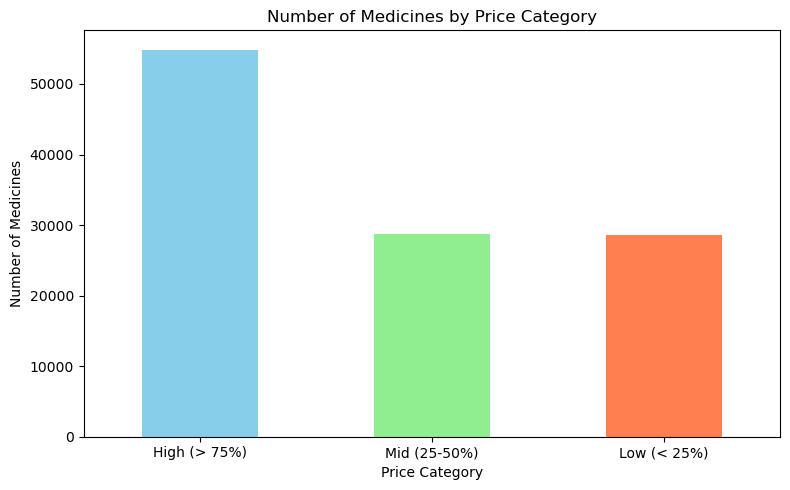

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Quartile boundaries from the summary
price_25 = 55.00000
price_50 = 85.00000
price_75 = 140.00000

# Add a 'price_category' column based on price ranges
data['price_category'] = pd.cut(data['price(₹)'], 
                              bins=[-float('inf'), price_25, price_50, float('inf')], 
                              labels=['Low (< 25%)', 'Mid (25-50%)', 'High (> 75%)'])

# Count the number of medicines in each price category
category_counts = data['price_category'].value_counts()

# Visualization: Bar chart for clustering
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])
plt.title('Number of Medicines by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Medicines')
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


<Axes: ylabel='price(₹)'>

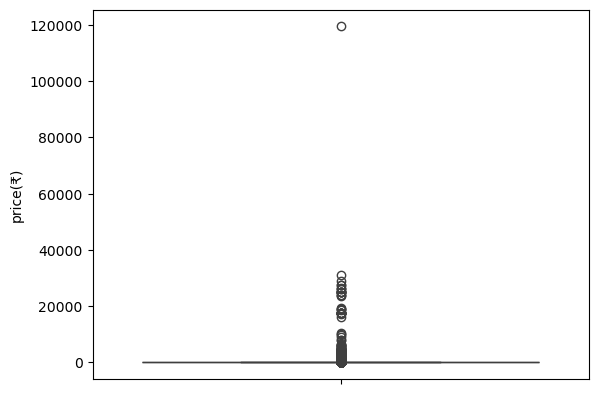

In [104]:
sns.boxplot(data['price(₹)'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\3821099367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_category', data=data, palette='viridis')


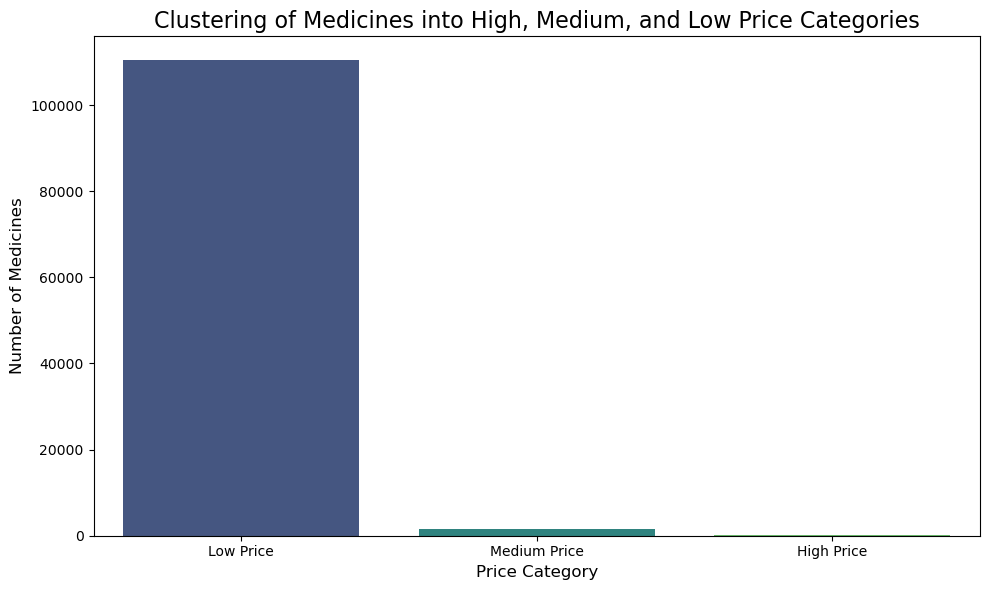

In [114]:


# Define price bins (low, medium, high) based on the distribution of prices
price_bins = [0, 500, 2000, data['price(₹)'].max()]
price_labels = ['Low Price', 'Medium Price', 'High Price']

# Create a new column categorizing the prices
data['price_category'] = pd.cut(data['price(₹)'], bins=price_bins, labels=price_labels)

# Create a bar chart to show the count of medicines in each price category
plt.figure(figsize=(10, 6))
sns.countplot(x='price_category', data=data, palette='viridis')

# Add titles and labels
plt.title('Clustering of Medicines into High, Medium, and Low Price Categories', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Medicines', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\4122314780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')


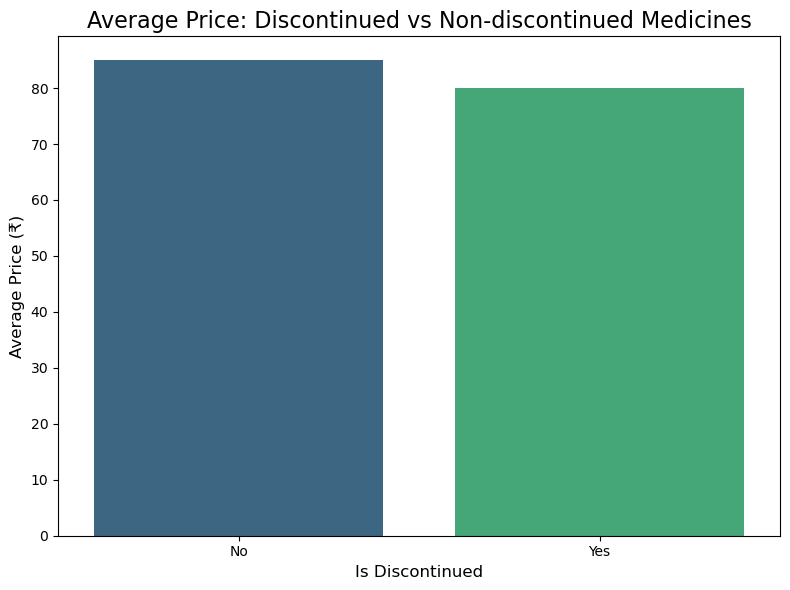

In [122]:


# Group data by 'Is_discontinued' and calculate average price
avg_price = data.groupby('Is_discontinued')['price(₹)'].median()

# Create a bar chart to compare the average prices
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')

# Add titles and labels
plt.title('Average Price: Discontinued vs Non-discontinued Medicines', fontsize=16)
plt.xlabel('Is Discontinued', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()

# Show the plot
plt.show()


In [232]:
plt.figure(figsize=(12, 6))
sns.barplot(x='manufacturer_name', y='count', data= Is_discontinued_count, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Number of Is_discontinued Medicines by Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Count of Is_discontinued Medicines', fontsize=12)
plt.tight_layout()

plt.show()

NameError: name 'Is_discontinued_count' is not defined

<Figure size 1200x600 with 0 Axes>

In [116]:
data['manufacturer_name'].value_counts()

manufacturer_name
Sun Pharmaceutical Industries Ltd     888
Cipla Ltd                             791
Alkem Laboratories Ltd                693
Torrent Pharmaceuticals Ltd           690
Lupin Ltd                             682
                                     ... 
Auxiliare Healthcare Pvt Ltd            1
Vision Remedies                         1
Isakura Healthcare Private Limited      1
Accentus Health Care                    1
Anamiva Life Sciences                   1
Name: count, Length: 6644, dtype: int64

In [ ]:
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\2024639074.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer_name', y='medicine_count', data=top_5_manufacturers, palette='Blues_d')


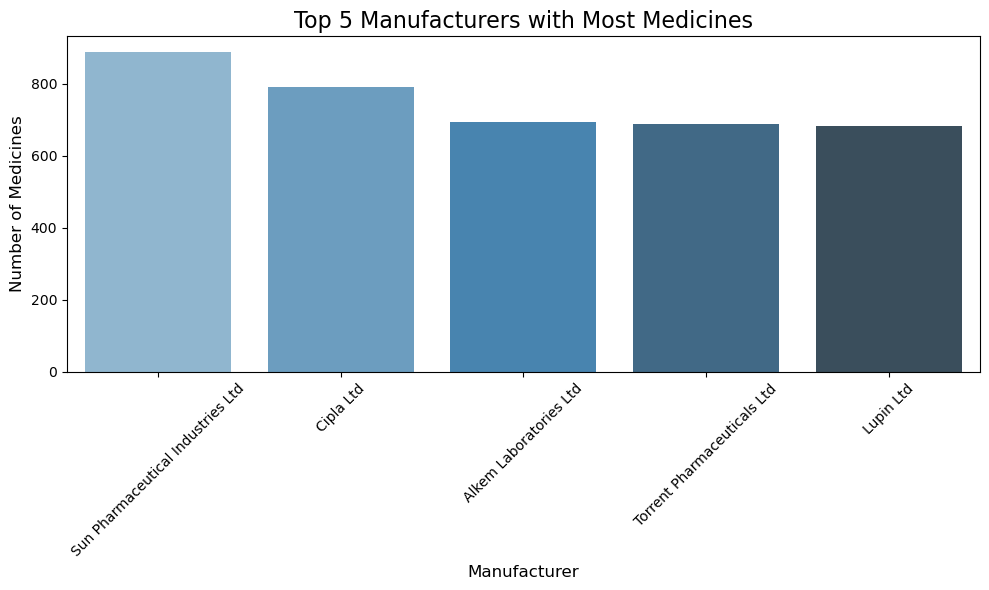

In [126]:


# Group by manufacturer and count the number of medicines
manufacturer_counts = data['manufacturer_name'].value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer_name', 'medicine_count']

# Get top 5 and bottom 5 manufacturers
top_5_manufacturers = manufacturer_counts.head(5)
bottom_5_manufacturers = manufacturer_counts.tail(5)

# Visualize the top 5 manufacturers
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer_name', y='medicine_count', data=top_5_manufacturers, palette='Blues_d')
plt.title('Top 5 Manufacturers with Most Medicines', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of Medicines', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\3692299521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer_name', y='medicine_count', data=bottom_5_manufacturers, palette='Reds_d')


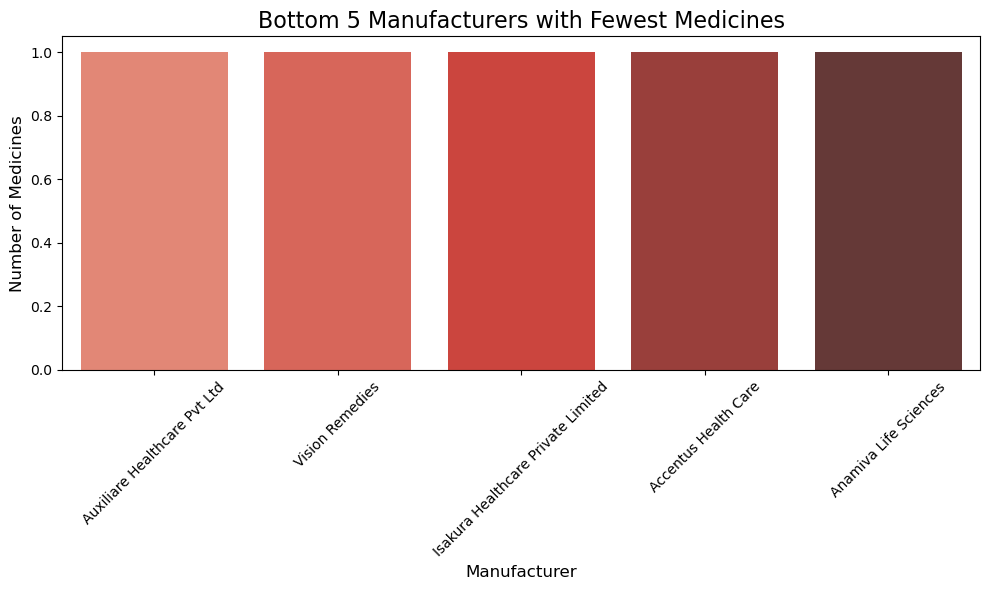

In [138]:

# Visualize the bottom 5 manufacturers
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer_name', y='medicine_count', data=bottom_5_manufacturers, palette='Reds_d')

plt.title('Bottom 5 Manufacturers with Fewest Medicines', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of Medicines', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\3996389539.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer_name', y='price(₹)', data=total_price_consumed, palette='Blues_d')


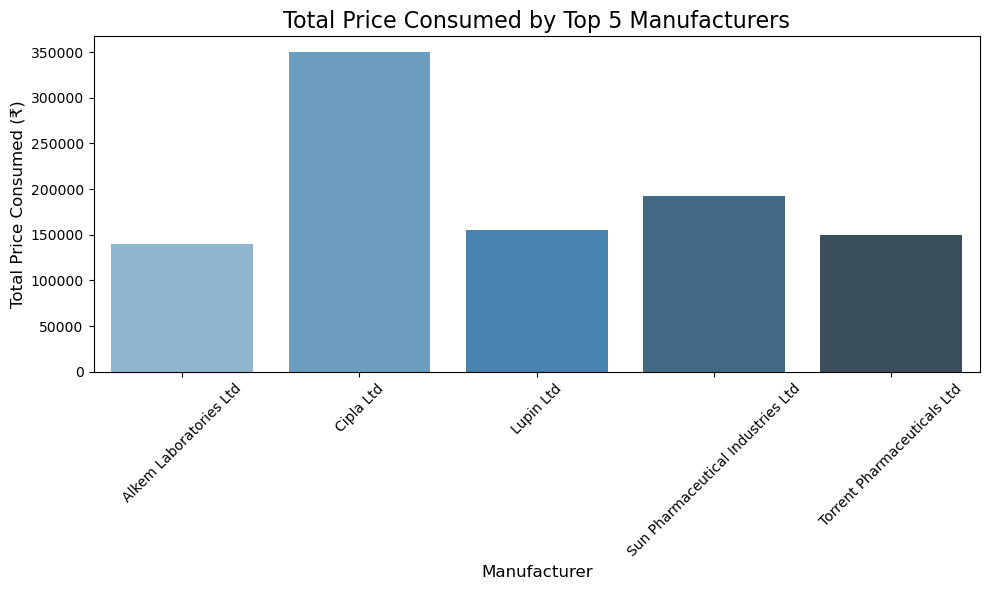

                   manufacturer_name   price(₹)
0             Alkem Laboratories Ltd  140432.21
1                          Cipla Ltd  349827.96
2                          Lupin Ltd  155236.99
3  Sun Pharmaceutical Industries Ltd  191965.13
4        Torrent Pharmaceuticals Ltd  150113.75


In [140]:


# Group by manufacturer and count the number of medicines
manufacturer_counts = data['manufacturer_name'].value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer_name', 'medicine_count']

# Get top 5 manufacturers
top_5_manufacturers = manufacturer_counts.head(5)

# Calculate total price for top 5 manufacturers
total_price_consumed = data[data['manufacturer_name'].isin(top_5_manufacturers['manufacturer_name'])].groupby('manufacturer_name')['price(₹)'].sum().reset_index()

# Merge with the top 5 counts for better visualization
total_price_consumed = total_price_consumed.merge(top_5_manufacturers, on='manufacturer_name')

# Visualize the total price consumed by top 5 manufacturers
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer_name', y='price(₹)', data=total_price_consumed, palette='Blues_d')
plt.title('Total Price Consumed by Top 5 Manufacturers', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Total Price Consumed (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the total price consumed for each of the top 5 manufacturers
print(total_price_consumed[['manufacturer_name', 'price(₹)']])


C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\3383940725.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer_name', y='price(₹)', data=total_price_consumed_bottom, palette='Reds_d')


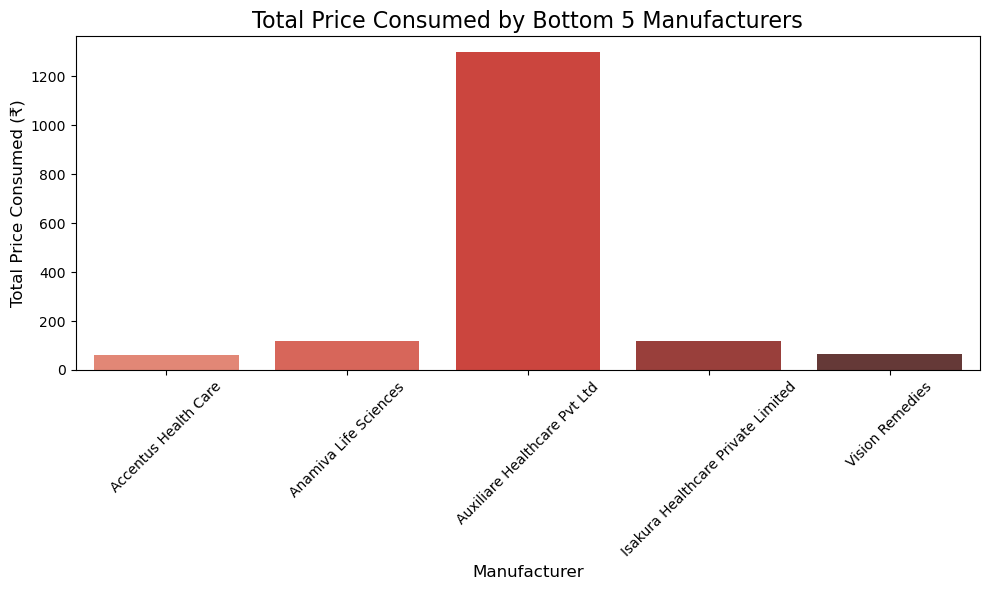

                    manufacturer_name  price(₹)
0                Accentus Health Care      60.0
1               Anamiva Life Sciences     120.0
2        Auxiliare Healthcare Pvt Ltd    1299.0
3  Isakura Healthcare Private Limited     120.0
4                     Vision Remedies      64.0


In [142]:


# Group by manufacturer and count the number of medicines
manufacturer_counts = data['manufacturer_name'].value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer_name', 'medicine_count']

# Get bottom 5 manufacturers
bottom_5_manufacturers = manufacturer_counts.tail(5)

# Calculate total price for bottom 5 manufacturers
total_price_consumed_bottom = data[data['manufacturer_name'].isin(bottom_5_manufacturers['manufacturer_name'])].groupby('manufacturer_name')['price(₹)'].sum().reset_index()

# Merge with the bottom 5 counts for better visualization
total_price_consumed_bottom = total_price_consumed_bottom.merge(bottom_5_manufacturers, on='manufacturer_name')

# Visualize the total price consumed by bottom 5 manufacturers
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer_name', y='price(₹)', data=total_price_consumed_bottom, palette='Reds_d')
plt.title('Total Price Consumed by Bottom 5 Manufacturers', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Total Price Consumed (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the total price consumed for each of the bottom 5 manufacturers
print(total_price_consumed_bottom[['manufacturer_name', 'price(₹)']])


In [150]:


# Group by manufacturer and count the number of medicines
manufacturer_counts = data['manufacturer_name'].value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer_name', 'medicine_count']

# Get bottom 5 manufacturers
bottom_5_manufacturers = manufacturer_counts.tail(5)

# Filter data for bottom 5 manufacturers and for "strip" and "syrup" categories
strip_and_syrup_data = data 
[(data['manufacturer_name'].isin(bottom_5_manufacturers['manufacturer_name'])) & 
                             (data.isin(['strip', 'syrup']))]

# Calculate total price for "strip" and "syrup" for bottom 5 manufacturers
total_price_consumed_bottom_strip_syrup = strip_and_syrup_data.groupby('manufacturer_name')['price(₹)'].sum().reset_index()

# Merge with the bottom 5 counts for better visualization
total_price_consumed_bottom_strip_syrup = total_price_consumed_bottom_strip_syrup.merge(bottom_5_manufacturers, on='manufacturer_name')

# Visualize the total price consumed by bottom 5 manufacturers for strip and syrup
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer_name', y='price(₹)', data=total_price_consumed_bottom_strip_syrup, palette='Reds_d')
plt.title('Total Price Consumed by Bottom 5 Manufacturers for Strip and Syrup Medicines', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Total Price Consumed (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the total price consumed for each of the bottom 5 manufacturers for strip and syrup
print(total_price_consumed_bottom_strip_syrup[['manufacturer_name', 'price(₹)']])


MemoryError: Unable to allocate 93.7 GiB for an array with shape (112171, 112171) and data type float64

In [152]:


# Group by manufacturer and count the number of medicines
manufacturer_counts = data['manufacturer_name'].value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer_name', 'medicine_count']

# Get bottom 5 manufacturers
bottom_5_manufacturers = manufacturer_counts.tail(5)

# Filter data for bottom 5 manufacturers and for "strip" and "syrup" categories
strip_and_syrup_data = data[
    (data['manufacturer_name'].isin(bottom_5_manufacturers['manufacturer_name'])) & 
    (data .isin(['strip', 'syrup']))
]

# Calculate total price for "strip" and "syrup" for bottom 5 manufacturers
total_price_consumed_bottom_strip_syrup = strip_and_syrup_data.groupby('manufacturer_name')['price(₹)'].sum().reset_index()

# Merge with the bottom 5 counts for better visualization
total_price_consumed_bottom_strip_syrup = total_price_consumed_bottom_strip_syrup.merge(bottom_5_manufacturers, on='manufacturer_name')

# Visualize the total price consumed by bottom 5 manufacturers for strip and syrup
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer_name', y='price(₹)', data=total_price_consumed_bottom_strip_syrup, palette='Reds_d')
plt.title('Total Price Consumed by Bottom 5 Manufacturers for Strip and Syrup Medicines', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Total Price Consumed (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the total price consumed for each of the bottom 5 manufacturers for strip and syrup
print(total_price_consumed_bottom_strip_syrup[['manufacturer_name', 'price(₹)']])


MemoryError: Unable to allocate 93.7 GiB for an array with shape (112171, 112171) and data type float64

In [154]:


# Group by manufacturer and count the number of medicines
manufacturer_counts = data['manufacturer_name'].value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer_name', 'medicine_count']

# Get top 5 manufacturers
top_5_manufacturers = manufacturer_counts.head(5)

# Filter data for top 5 manufacturers and for "strip" and "syrup" categories
strip_and_syrup_data_top = data[
    (data['manufacturer_name'].isin(top_5_manufacturers['manufacturer_name'])) & 
    (data.isin(['strip', 'syrup']))
]

# Calculate total price for "strip" and "syrup" for top 5 manufacturers
total_price_consumed_top_strip_syrup = strip_and_syrup_data_top.groupby('manufacturer_name')['price(₹)'].sum().reset_index()

# Merge with the top 5 counts for better visualization
total_price_consumed_top_strip_syrup = total_price_consumed_top_strip_syrup.merge(top_5_manufacturers, on='manufacturer_name')

# Visualize the total price consumed by top 5 manufacturers for strip and syrup
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer_name', y='price(₹)', data=total_price_consumed_top_strip_syrup, palette='Blues_d')
plt.title('Total Price Consumed by Top 5 Manufacturers for Strip and Syrup Medicines', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Total Price Consumed (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the total price consumed for each of the top 5 manufacturers for strip and syrup
print(total_price_consumed_top_strip_syrup[['manufacturer_name', 'price(₹)']])


MemoryError: Unable to allocate 93.7 GiB for an array with shape (112171, 112171) and data type float64

In [156]:


# Define a function to categorize the pack size
def categorize_pack_size(label):
    if 'strip' in label.lower():
        return 'strip'
    elif 'bottle' in label.lower():
        return 'bottle'
    else:
        return 'other'  # or return None, or any default category you prefer

# Apply the function to create a new column
data['pack_size_category'] = data['pack_size_label'].apply(categorize_pack_size)

# Display the updated DataFrame with the new column
print(data[['pack_size_label', 'pack_size_category']].head())


          pack_size_label pack_size_category
0     strip of 10 tablets              strip
1  bottle of 100 ml Syrup             bottle
2     strip of 10 tablets              strip
3     strip of 10 tablets              strip
4  bottle of 100 ml Syrup             bottle


   Unnamed: 0  id                             name  price(₹)  Is_discontinued  \
0           0   1         Augmentin 625 Duo Tablet    223.42            False   
1           2   3                 Ascoril LS Syrup    118.00            False   
2           5   6                 Allegra-M Tablet    241.48            False   
3           6   7             Amoxyclav 625 Tablet    223.27            False   
4           9  10  Ascoril D Plus Syrup Sugar Free    129.00            False   

                      manufacturer_name       type         pack_size_label  \
0  Glaxo SmithKline Pharmaceuticals Ltd  allopathy     strip of 10 tablets   
1          Glenmark Pharmaceuticals Ltd  allopathy  bottle of 100 ml Syrup   
2                     Sanofi India  Ltd  allopathy     strip of 10 tablets   
3                                Abbott  allopathy     strip of 10 tablets   
4          Glenmark Pharmaceuticals Ltd  allopathy  bottle of 100 ml Syrup   

      short_composition1                shor

C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\589077120.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Discontinued', y='Average Price (₹)', data=price_comparison, palette='Set2')


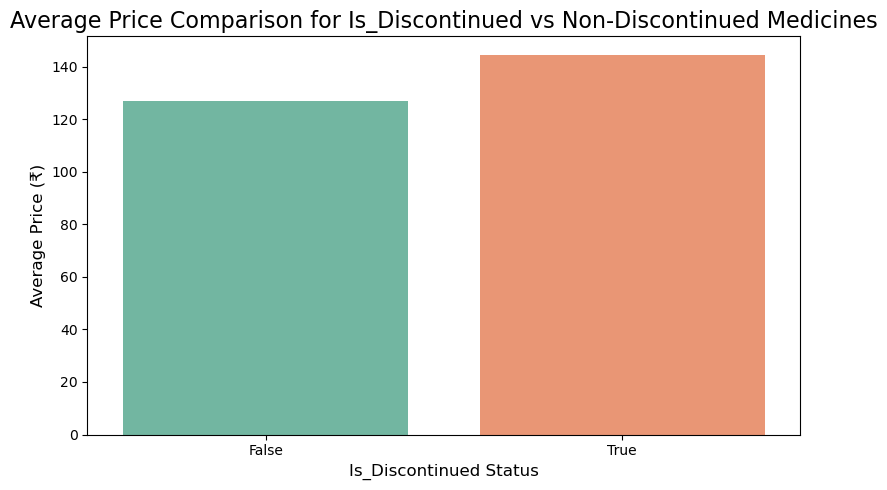

   Is_Discontinued  Average Price (₹)
0            False         126.893071
1             True         144.397762


In [160]:


# Check the structure of the dataset
print(data.head())

# Group the data by 'discontinued' status and calculate the average price
price_comparison = data.groupby('Is_discontinued')['price(₹)'].mean().reset_index()

# Rename columns for better clarity
price_comparison.columns = ['Is_Discontinued', 'Average Price (₹)']

# Visualize the comparison using a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Is_Discontinued', y='Average Price (₹)', data=price_comparison, palette='Set2')
plt.title('Average Price Comparison for Is_Discontinued vs Non-Discontinued Medicines', fontsize=16)
plt.xlabel('Is_Discontinued Status', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Display the price comparison DataFrame
print(price_comparison)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\4278524608.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Is_discontinued', y='Average Price (₹)', data=price_comparison, palette='Set2', ci="sd")
C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\4278524608.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_discontinued', y='Average Price (₹)', data=price_comparison, palette='Set2', ci="sd")


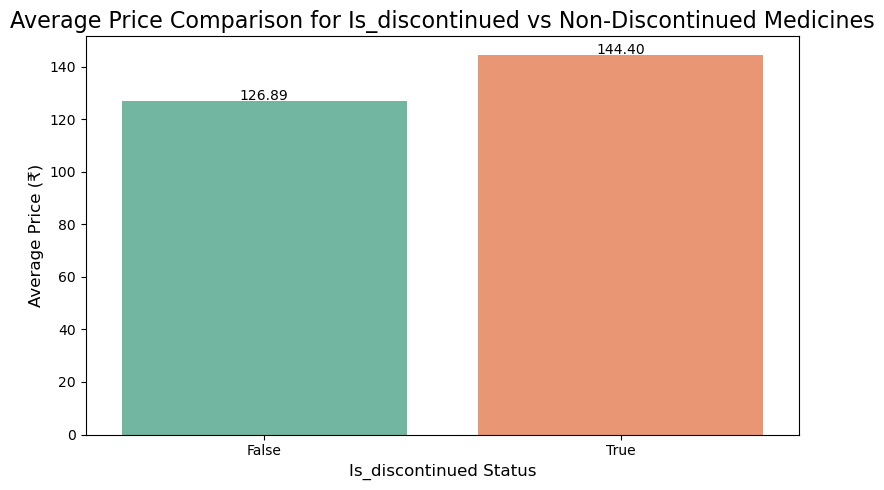

   Is_discontinued  Average Price (₹)   Count
0            False         126.893071  109320
1             True         144.397762    2851


In [170]:


# Group the data by 'discontinued' status and calculate the average price and count
price_comparison = data.groupby('Is_discontinued')['price(₹)'].agg(['mean', 'count']).reset_index()

# Rename columns for better clarity
price_comparison.columns = ['Is_discontinued', 'Average Price (₹)', 'Count']

# Visualize the comparison using a bar chart with error bars
plt.figure(figsize=(8, 5))
sns.barplot(x='Is_discontinued', y='Average Price (₹)', data=price_comparison, palette='Set2', ci="sd")
plt.title('Average Price Comparison for Is_discontinued vs Non-Discontinued Medicines',fontsize=16)
plt.xlabel('Is_discontinued Status', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Display the average prices and counts on the bars
for index, row in price_comparison.iterrows():
    plt.text(index, row['Average Price (₹)'] + 0.5, f'{row["Average Price (₹)"]:.2f}', 
             color='black', ha="center")

plt.show()

# Display the price comparison DataFrame
print(price_comparison)


In [174]:
print(data.columns)


Index(['Unnamed: 0', 'id', 'name', 'price(₹)', 'Is_discontinued',
       'manufacturer_name', 'type', 'pack_size_label', 'short_composition1',
       'short_composition2', 'price_category', 'pack_size_category'],
      dtype='object')


In [210]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='medicine_form', y='price(₹)', hue='discontinued', df=data, palette='Set2')
plt.title('Price Distribution by Medicine Form and Discontinued Status', fontsize=16)
plt.xlabel('Medicine Form', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `medicine_form` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [178]:
# Check column names
print(data.columns)

# Check the first few rows to confirm data is loaded correctly
print(data.head())

# Assuming the column is correctly named 'medicine_form' in your dataset:
plt.figure(figsize=(10, 6))
sns.boxplot(x='medicine_form', y='price(₹)', hue='discontinued', data=data, palette='Set2')
plt.title('Price Distribution by Medicine Form and Discontinued Status', fontsize=16)
plt.xlabel('Medicine Form', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Index(['Unnamed: 0', 'id', 'name', 'price(₹)', 'Is_discontinued',
       'manufacturer_name', 'type', 'pack_size_label', 'short_composition1',
       'short_composition2', 'price_category', 'pack_size_category'],
      dtype='object')
   Unnamed: 0  id                             name  price(₹)  Is_discontinued  \
0           0   1         Augmentin 625 Duo Tablet    223.42            False   
1           2   3                 Ascoril LS Syrup    118.00            False   
2           5   6                 Allegra-M Tablet    241.48            False   
3           6   7             Amoxyclav 625 Tablet    223.27            False   
4           9  10  Ascoril D Plus Syrup Sugar Free    129.00            False   

                      manufacturer_name       type         pack_size_label  \
0  Glaxo SmithKline Pharmaceuticals Ltd  allopathy     strip of 10 tablets   
1          Glenmark Pharmaceuticals Ltd  allopathy  bottle of 100 ml Syrup   
2                     Sanofi India  Ltd  all

ValueError: Could not interpret value `medicine_form` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [180]:


# Check column names to confirm 'medicine_form' and 'price(₹)' columns exist
print(data.columns)

# Check the first few rows of the data
print(data.head())

# Assuming the column you are interested in is 'medicine_form' and price column is 'price(₹)'
plt.figure(figsize=(10, 6))

# Create a bar plot to compare the average price across different medicine forms
sns.barplot(x='medicine_form', y='price(₹)', data=data, palette='Set2')

plt.title('Average Price by Medicine Form', fontsize=16)
plt.xlabel('Medicine Form', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


Index(['Unnamed: 0', 'id', 'name', 'price(₹)', 'Is_discontinued',
       'manufacturer_name', 'type', 'pack_size_label', 'short_composition1',
       'short_composition2', 'price_category', 'pack_size_category'],
      dtype='object')
   Unnamed: 0  id                             name  price(₹)  Is_discontinued  \
0           0   1         Augmentin 625 Duo Tablet    223.42            False   
1           2   3                 Ascoril LS Syrup    118.00            False   
2           5   6                 Allegra-M Tablet    241.48            False   
3           6   7             Amoxyclav 625 Tablet    223.27            False   
4           9  10  Ascoril D Plus Syrup Sugar Free    129.00            False   

                      manufacturer_name       type         pack_size_label  \
0  Glaxo SmithKline Pharmaceuticals Ltd  allopathy     strip of 10 tablets   
1          Glenmark Pharmaceuticals Ltd  allopathy  bottle of 100 ml Syrup   
2                     Sanofi India  Ltd  all

ValueError: Could not interpret value `medicine_form` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [182]:


# Check the column names to verify that 'manufacturer_name', 'form', and 'price(₹)' exist
print(data.columns)

# Group the data by 'manufacturer_name' and 'form', and calculate the average price
avg_price_by_manufacturer_form = data.groupby(['manufacturer_name'])['price(₹)'].mean().reset_index()

# Check the grouped data to ensure it's correct
print(avg_price_by_manufacturer_form.head())

# Create a bar plot to visualize the average price across manufacturers and forms
plt.figure(figsize=(12, 6))
sns.barplot(x='manufacturer_name', y='price(₹)', hue='form', data=avg_price_by_manufacturer_form, palette='Set2')

# Add title and labels
plt.title('Average Price by Manufacturer and Form', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


Index(['Unnamed: 0', 'id', 'name', 'price(₹)', 'Is_discontinued',
       'manufacturer_name', 'type', 'pack_size_label', 'short_composition1',
       'short_composition2', 'price_category', 'pack_size_category'],
      dtype='object')
            manufacturer_name    price(₹)
0                10 Drug Mart  129.777778
1          3A Pharmaceuticals   71.250000
2  3C Health Solution Pvt Ltd   83.555556
3               3D Healthcare  108.725806
4   4Care Lifescience Pvt Ltd   95.941600


ValueError: Could not interpret value `form` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [50]:
data['pack_size_label'].value_counts()

pack_size_label
strip of 10 tablets                   54780
vial of 1 Injection                    5982
strip of 10 capsule sr                 5416
strip of 10 capsules                   5356
bottle of 100 ml Syrup                 4884
                                      ...  
vial of 5 ml Solution for Infusion        1
tube of 75 ml Conditioner                 1
bottle of 60 ml Conditioner               1
jar of 90 gm Powder                       1
bottle of 350 tablets                     1
Name: count, Length: 944, dtype: int64

In [54]:
data=data['pack_size_label']=='strip of 10 tablets'

In [56]:
data

0          True
1         False
2          True
3          True
4         False
          ...  
112166     True
112167    False
112168    False
112169     True
112170     True
Name: pack_size_label, Length: 112171, dtype: bool

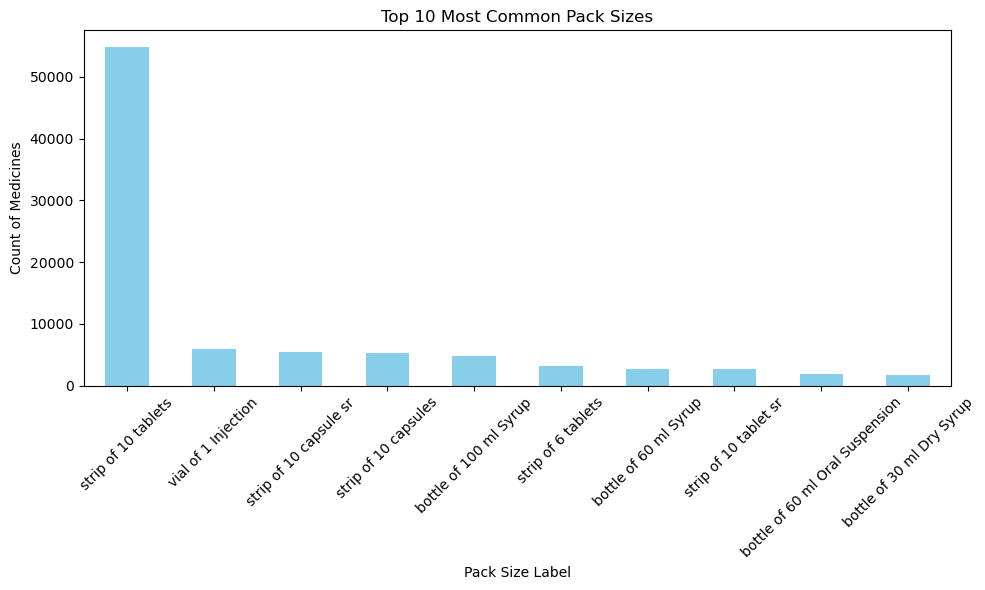

In [186]:


pack_size_counts = data['pack_size_label'].value_counts().head(10) 
plt.figure(figsize=(10, 6))
pack_size_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Pack Sizes')
plt.xlabel('Pack Size Label')
plt.ylabel('Count of Medicines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\530811263.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_composition1.index, y=top_composition1.values, palette="Blues_r")
C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\530811263.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_composition2.index, y=top_composition2.values, palette="Greens_r")


([0, 1, 2, 3, 4],
 [Text(0, 0, ' Rabeprazole (20mg)'),
  Text(1, 0, ' Paracetamol (325mg)'),
  Text(2, 0, ' Paracetamol (325mg) '),
  Text(3, 0, ' Pantoprazole (40mg)'),
  Text(4, 0, ' Metformin (500mg)')])

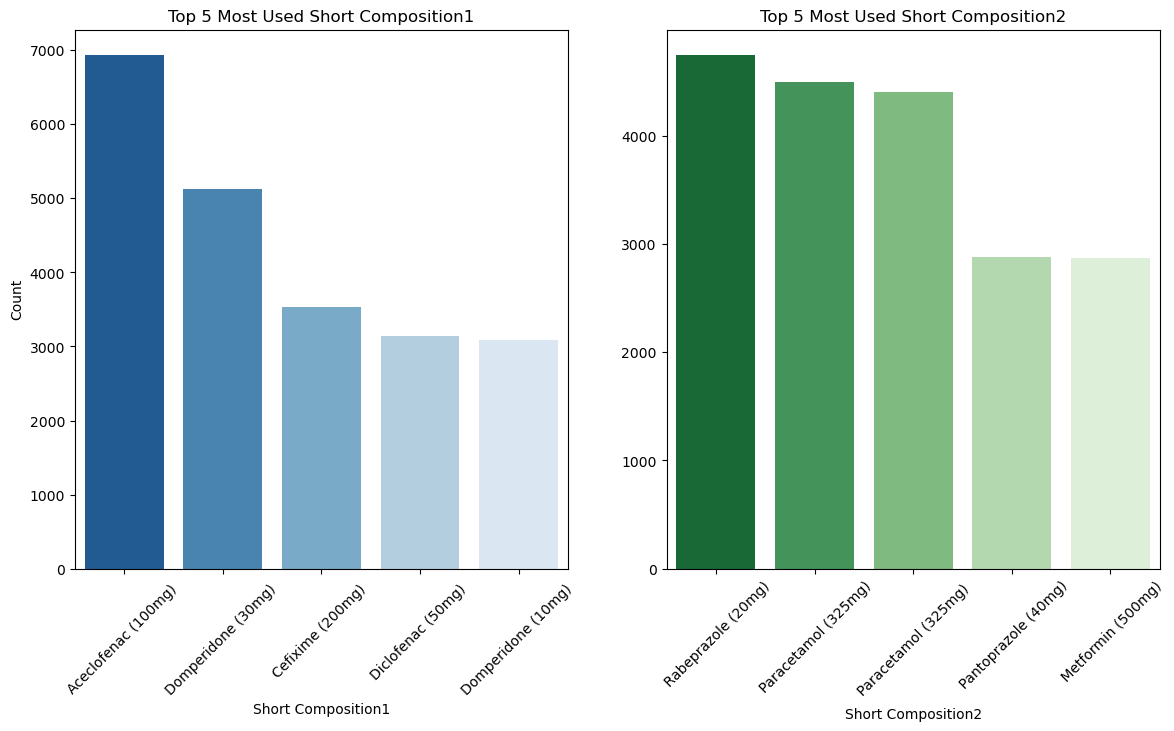

In [188]:


# Find the top 5 most frequent Short Composition1
top_composition1 = data['short_composition1'].value_counts().head(5)

# Find the top 5 most frequent Short Composition2
top_composition2 = data['short_composition2'].value_counts().head(5)

# Find the top 3 manufacturers associated with these compositions
# Filter dataset for top compositions in both columns
top_compositions_df = data[
    (data['short_composition1'].isin(top_composition1.index)) |
    (data['short_composition2'].isin(top_composition2.index))
]

# Count occurrences of manufacturers within this filtered data
top_manufacturers = top_compositions_df['manufacturer_name'].value_counts().head(3)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot for Short Composition1
plt.subplot(1, 2, 1)
sns.barplot(x=top_composition1.index, y=top_composition1.values, palette="Blues_r")
plt.title('Top 5 Most Used Short Composition1')
plt.xlabel('Short Composition1')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for Short Composition2
plt.subplot(1, 2, 2)
sns.barplot(x=top_composition2.index, y=top_composition2.values, palette="Greens_r")
plt.title('Top 5 Most Used Short Composition2')
plt.xlabel('Short Composition2')
plt.xticks(rotation=45)

In [208]:
data['short_composition1'] == ' Aceclofenac (100mg) '

0         False
1         False
2         False
3         False
4         False
          ...  
112166    False
112167    False
112168    False
112169    False
112170    False
Name: short_composition1, Length: 112171, dtype: bool

Top 5 Short Composition1 and Associated Manufacturers:
Aceclofenac (100mg) : Alkem Laboratories Ltd, Lupin Ltd, Aristo Pharmaceuticals Pvt Ltd, Medley Pharmaceuticals, Dr Reddy's Laboratories Ltd, Cadila Pharmaceuticals Ltd, FDC Ltd, Unison Pharmaceuticals Pvt Ltd, Tridoss Laboratories Pvt Ltd, Micro Labs Ltd, Leeford Healthcare Ltd, Wockhardt Ltd, Salud Care India Pvt Ltd, Themis Medicare Ltd, Indoco Remedies Ltd, Wallace Pharmaceuticals Pvt Ltd, Khandelwal Laboratories Pvt Ltd, Allenge India, Iscon Life Sciences, Maxis Healthcare, Oaknet Healthcare Pvt Ltd, Snu Biocare, Growmax Medicare Pvt Ltd, Albert David Ltd, Pharmagic Lifesciences, Nemi Pharmaceuticles, Astrum Healthcare Pvt  Ltd, Hicare Pharma, Baksun Healthcare Pvt Ltd, Injecto Capta Pvt Ltd, Austro Labs, Sunrest Life Science, Awakesoul Pharmaceutical Pvt Ltd, Ajanta Pharma Ltd, Fourrts India Laboratories Pvt Ltd, Gujarat Terce Laboratories Ltd, Eurocare, Blubell Pharma, Morepen Laboratories Ltd, Sycon Healthcare Pvt Ltd, Zeel

C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\1451581663.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_composition1.index, y=top_composition1.values, palette="Blues_r")
C:\Users\Admin\AppData\Local\Temp\ipykernel_2872\1451581663.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_composition2.index, y=top_composition2.values, palette="Greens_r")


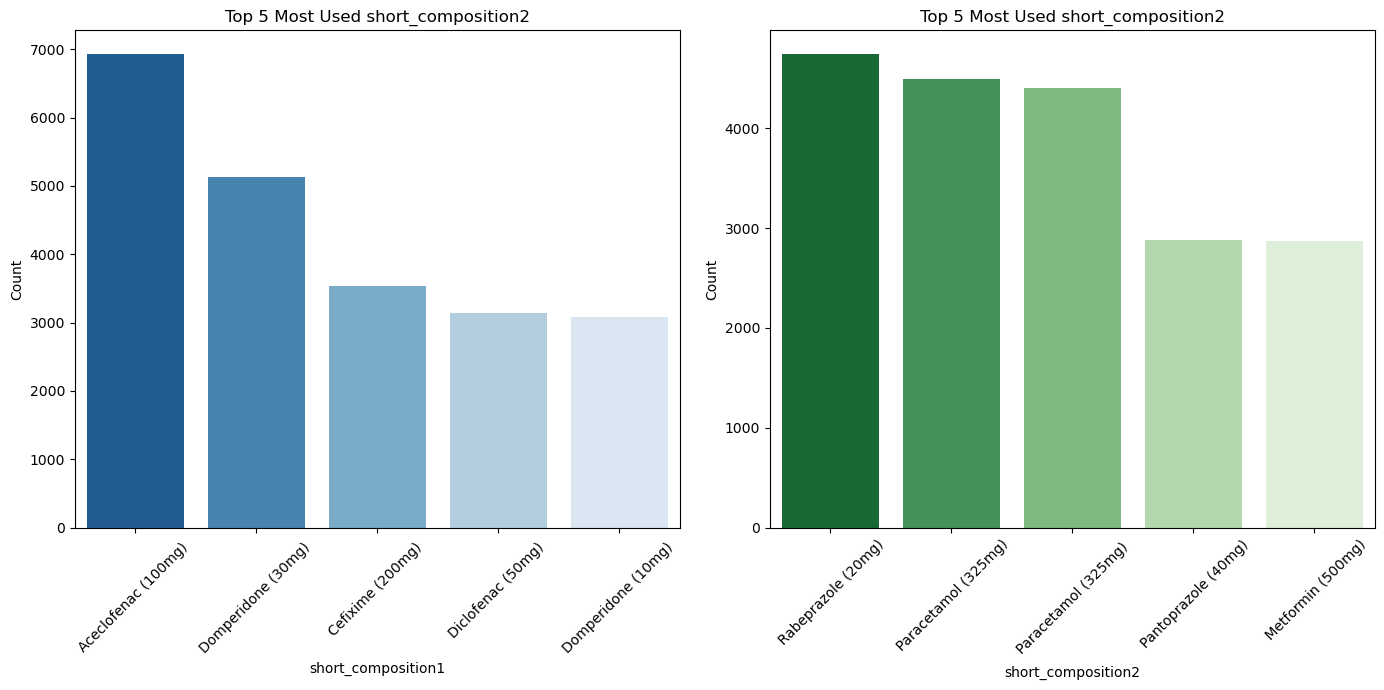

In [46]:



# Assuming your dataset has columns named 'Short Composition1', 'Short Composition2', and 'Manufacturer'

# Find the top 5 most frequent Short Composition1
top_composition1 =data['short_composition1'].value_counts().head(5)

# Find the top 5 most frequent Short Composition2
top_composition2 = data['short_composition2'].value_counts().head(5)

# Filter dataset for rows with top 5 Short Composition1 and Short Composition2
top_compositions_df = data[
    (data['short_composition1'].isin(top_composition1.index)) |
    (data['short_composition2'].isin(top_composition2.index))
]

# Group by manufacturer and composition to find occurrences of each manufacturer
top_manufacturers_composition1 = top_compositions_df.groupby('short_composition1')['manufacturer_name'].unique().reindex(top_composition1.index)
top_manufacturers_composition2 = top_compositions_df.groupby('short_composition2')['manufacturer_name'].unique().reindex(top_composition2.index)

# Display top 5 Short Composition1 and associated manufacturers
print("Top 5 Short Composition1 and Associated Manufacturers:")
for composition, manufacturers in top_manufacturers_composition1.items():
    print(f"{composition}: {', '.join(manufacturers)}")

# Display top 5 Short Composition2 and associated manufacturers
print("\nTop 5 Short Composition2 and Associated Manufacturers:")
for composition, manufacturers in top_manufacturers_composition2.items():
    print(f"{composition}: {', '.join(manufacturers)}")

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot for Short Composition1
plt.subplot(1, 2, 1)
sns.barplot(x=top_composition1.index, y=top_composition1.values, palette="Blues_r")
plt.title('Top 5 Most Used short_composition2')
plt.xlabel('short_composition1')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for Short Composition2
plt.subplot(1, 2, 2)
sns.barplot(x=top_composition2.index, y=top_composition2.values, palette="Greens_r")
plt.title('Top 5 Most Used short_composition2')
plt.xlabel('short_composition2')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
